<a href="https://colab.research.google.com/github/mohsen20100/DataAnalysis/blob/main/Copy_of_DataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Project Work
##Member: 
        Mohsen Fadaee
        Karim Gohsen
        Jack Awcock 

Used Data set (https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

In [ ]:
import  sklearn.linear_model as sklm
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_squared_error,r2_score
from sklearn.metrics  import f1_score
import sklearn.metrics as metrics
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import math
from IPython.display import display
%matplotlib inline

**Concrete compressive strength for general construction varies from 15 MPa (2200 psi) to 30 MPa (4400 psi) and higher in commercial and industrial structures. Compressive strength of concrete depends on many factors such as water-cement ratio, cement strength, quality of concrete material, quality control during the production of concrete, etc.**

#Read CSV File Concrete Compressive Strength Data Set

In [ ]:
df_data = pd.read_csv("Concrete_Data2.csv")
df_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength,Unnamed: 9,Unnamed: 10
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,NaN,NaN
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,NaN,NaN
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,NaN,NaN
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,NaN,NaN
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,NaN,NaN


#Cheaking the Shape of Dataset

In [ ]:
df_data.shape

(1030, 11)

#Scaling

In [ ]:
dataScaled = (df_data - df_data.min())/(df_data.max() - df_data.min())
dataScaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength,Unnamed: 9,Unnamed: 10
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485,NaN,NaN
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996,NaN,NaN
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655,NaN,NaN
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372,NaN,NaN
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860,NaN,NaN


# We scaled the data into new values that are easier to compare

In [ ]:
dataScaled[dataScaled.isna().any(axis = 1)]
dataScaledClean = dataScaled.dropna(axis=1)
dataScaledClean

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,0.522860
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,0.359412
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,0.266226
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,0.379220


 # Visual Summary of our data

AttributeError: ignored

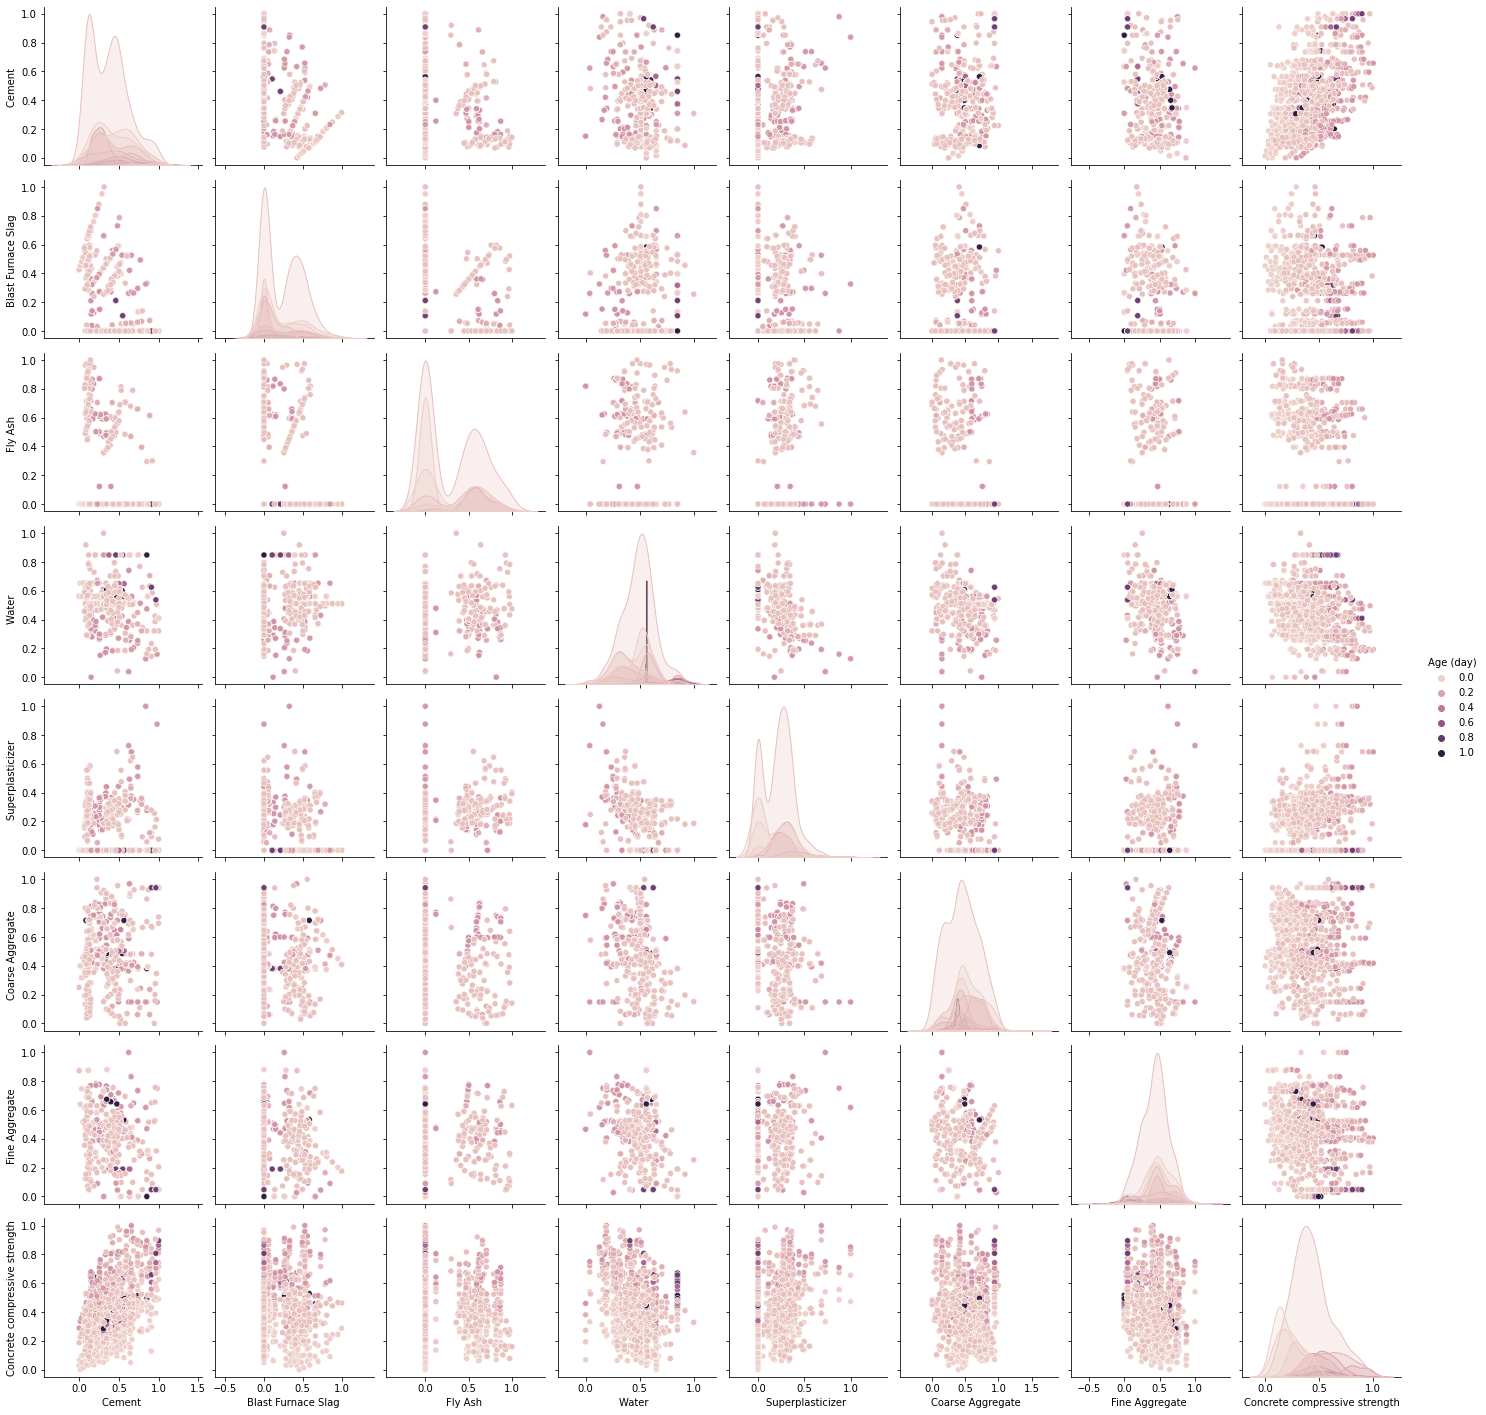

In [ ]:
sns.pairplot(dataScaledClean,diag_kind="kde",
             hue="Age (day)")
plt.rcparms["figure.figsize"] = (2,2)
plt.suotitle("figer lol ", size = 14, color = "Blue");

#

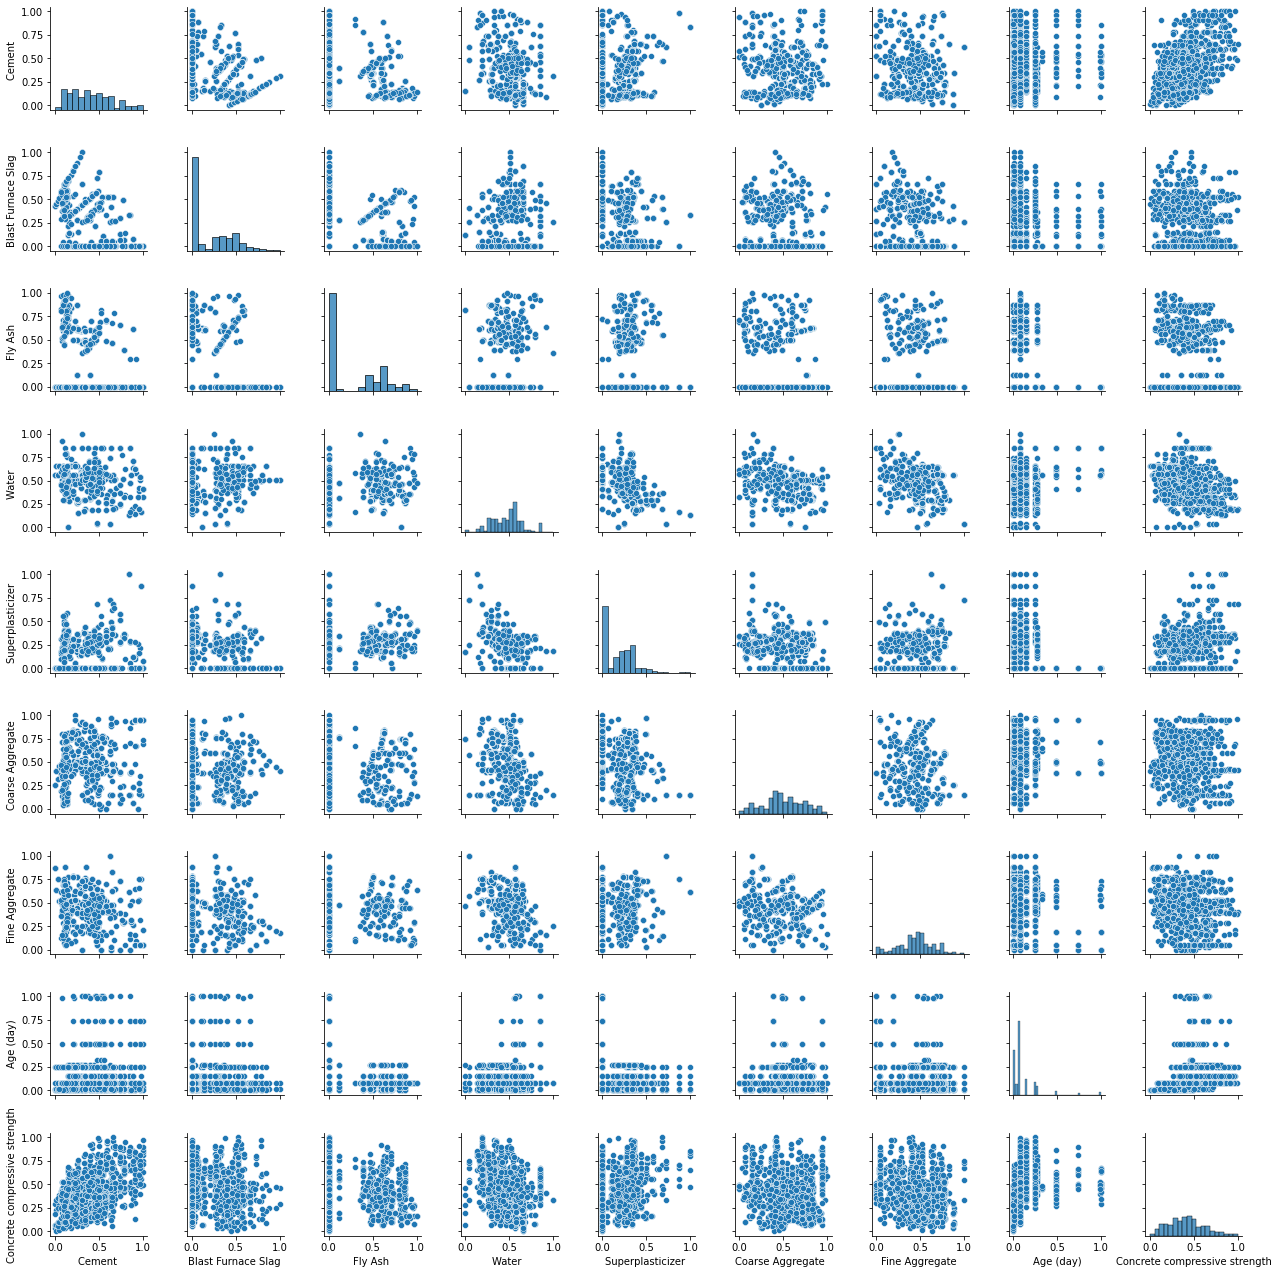

<Figure size 1296x1296 with 0 Axes>

In [ ]:
from IPython.display import Image
sns_plot = sns.pairplot(dataScaledClean, height=2.0)
sns_plot.savefig("dataScaledClean.png")
plt.clf()
Image(filename="dataScaledClean.png")

# Coefficient 

In [ ]:
Coefficient =dataScaledClean.corr()
print(Coefficient)

                                Cement   Blast Furnace Slag   Fly Ash   \
Cement                         1.000000            -0.275216 -0.397467   
Blast Furnace Slag            -0.275216             1.000000 -0.323580   
Fly Ash                       -0.397467            -0.323580  1.000000   
Water                         -0.081587             0.107252 -0.256984   
Superplasticizer               0.092386             0.043270  0.377503   
Coarse Aggregate              -0.109349            -0.283999 -0.009961   
Fine Aggregate                -0.222718            -0.281603  0.079108   
Age (day)                      0.081946            -0.044246 -0.154371   
Concrete compressive strength  0.497832             0.134829 -0.105755   

                                Water    Superplasticizer   \
Cement                        -0.081587           0.092386   
Blast Furnace Slag             0.107252           0.043270   
Fly Ash                       -0.256984           0.377503   
Water      

# Matrix

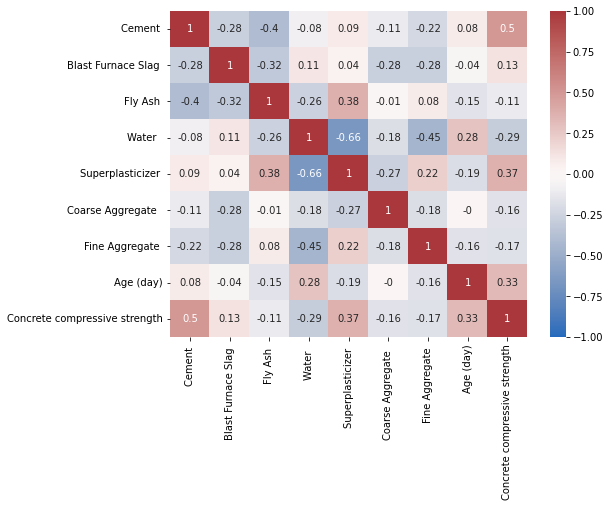

In [ ]:
Matrix= dataScaledClean.corr().round(2)
plt.rcParams["figure.figsize"] = (8,6)
sns.heatmap(Matrix, annot=True, vmax = 1, vmin = -1, center = 0, cmap= "vlag")
plt.show()

# Cleaning 

In [ ]:
dataScaledCleanTraining = dataScaledClean.sample(frac=0.8,random_state=200)
dataScaledCleanTraining

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
571,0.287671,0.951864,0.000000,0.510383,0.000000,0.450000,0.201455,0.074176,0.465554
546,0.527397,0.000000,0.000000,0.560703,0.000000,0.378488,0.623683,0.074176,0.369254
610,0.305936,0.000000,0.000000,0.568690,0.000000,0.485465,0.730055,1.000000,0.283418
1017,0.483562,0.000000,0.562719,0.384185,0.313665,0.361337,0.473909,0.074176,0.450106
754,1.000000,0.000000,0.000000,0.408946,0.000000,0.941860,0.047667,0.244505,0.838794
...,...,...,...,...,...,...,...,...,...
308,0.399772,0.000000,0.486757,0.309904,0.366460,0.502616,0.706473,0.271978,0.664134
766,0.646119,0.000000,0.000000,0.512780,0.000000,0.479651,0.423984,0.035714,0.318799
414,0.201598,0.000000,0.625687,0.357827,0.307453,0.808140,0.514049,0.005495,0.127320
728,0.522831,0.000000,0.000000,0.560703,0.000000,0.651163,0.569493,0.074176,0.366388


# Distribution 1

In [ ]:
def DependentHist(nBins = 5, PlotKDE = False):
  sns.histplot(data = dataScaledCleanTraining["Age (day)"], 
               bins = nBins, kde = PlotKDE)
  
interact(DependentHist, nBins = [5,10,15,20,25,30,35,40,45,50], 
         PlotKDE = False, size=(8,6))
plt.show() 

interactive(children=(Dropdown(description='nBins', options=(5, 10, 15, 20, 25, 30, 35, 40, 45, 50), value=5),…

# Distribution 2

In [ ]:
def DependentHist1(Bins=5,PlotKDE = False):
    sns.histplot(data = dataScaledCleanTraining
                 ['Concrete compressive strength'], bins = Bins, kde = PlotKDE)
    #return Bins

interact(DependentHist1, Bins=(5,50,5), PlotKDE = False,size=(8,6),Text="")
plt.show()

interactive(children=(IntSlider(value=5, description='Bins', max=50, min=5, step=5), Checkbox(value=False, des…

# Data Clean/ training

In [ ]:
for i in dataScaledCleanTraining.columns:
  dataScaledCleanTraining[i] = dataScaledCleanTraining[i].replace
  ({"unknown":np.nan})
dataScaledCleanTraining  

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
571,0.287671,0.951864,0.000000,0.510383,0.000000,0.450000,0.201455,0.074176,0.465554
546,0.527397,0.000000,0.000000,0.560703,0.000000,0.378488,0.623683,0.074176,0.369254
610,0.305936,0.000000,0.000000,0.568690,0.000000,0.485465,0.730055,1.000000,0.283418
1017,0.483562,0.000000,0.562719,0.384185,0.313665,0.361337,0.473909,0.074176,0.450106
754,1.000000,0.000000,0.000000,0.408946,0.000000,0.941860,0.047667,0.244505,0.838794
...,...,...,...,...,...,...,...,...,...
308,0.399772,0.000000,0.486757,0.309904,0.366460,0.502616,0.706473,0.271978,0.664134
766,0.646119,0.000000,0.000000,0.512780,0.000000,0.479651,0.423984,0.035714,0.318799
414,0.201598,0.000000,0.625687,0.357827,0.307453,0.808140,0.514049,0.005495,0.127320
728,0.522831,0.000000,0.000000,0.560703,0.000000,0.651163,0.569493,0.074176,0.366388


# histplot

AttributeError: ignored

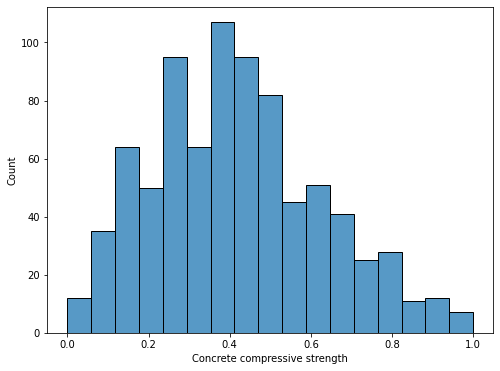

In [ ]:
sns.histplot(dataScaledCleanTraining["Concrete compressive strength"])
plt.reparams["figure.figsize"] = (8,6)